### Question 1: -
Write a program that takes a string as input, and counts the frequency of each word in the string, there might
be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
highest-frequency word.

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

Example input - string = “write write write all the number from from from 1 to 100”

Example output - 5

Explanation - From the given string we can note that the most frequent words are “write” and “from” and
the maximum value of both the values is “write” and its corresponding length is 5

In [29]:
import re

def length_of_highest_freq_word():
    words = input('Enter the input string :')
    words = words.lower()
    words = re.sub(r'[^\w\s]', ' ', words)
    words = words.split()
    word_counts = {}
    freq_word_counts=list()

    for word in words:
      word_counts[word] = word_counts.get(word, 0) + 1

    print(word_counts)
    max_frequency = max(word_counts.values())
#     print(max_frequency)
    longest_word_length = max(len(word) for word, count in word_counts.items() if count == max_frequency)
    
    return longest_word_length

#### Testcase1 : To check for a normal phrase of words to check if the counts and frequency are captured properly.

In [27]:
length_of_highest_freq_word()

Enter the input string :Hai Karan how is life life life I hope you you you are doing doing well


4

#### Explanation:
- Here we have words 'life' and 'you' repeated thrice in the sentence. 
- Since 'life' has maximum size, its length is being returned as output.

#### Testcase2 : To check for words with punctuation and upper case

In [30]:
length_of_highest_freq_word()

Enter the input string :Hello! sir. This is Saravanesh, Hope you are doing well.Sir I need to meet you.Will you provide an appointment Sir?
{'hello': 1, 'sir': 3, 'this': 1, 'is': 1, 'saravanesh': 1, 'hope': 1, 'you': 3, 'are': 1, 'doing': 1, 'well': 1, 'i': 1, 'need': 1, 'to': 1, 'meet': 1, 'will': 1, 'provide': 1, 'an': 1, 'appointment': 1}


3

#### Explanation:
- In this sentence we have both upper and lower cases along with punctuation marks. 
- all the words are first converted to lower case and the punctuation marks are replaced with a space. 
- Then the length of each word is determined. 
- In this scenario, both the words 'sir' and 'you'are repeated thrice since they are of same length the max length is returned as 3.

### Question 2:
Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if
he can remove just one character at the index in the string, and the remaining characters will occur the same
number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

Example input 1 - s = “abc”. This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 }

Example output 1- YES

Example input 2 - s “abcc”. This string is not valid as we can remove only 1 occurrence of “c”. That leaves
character frequencies of { “a”: 1, “b”: 1 , “c”: 2 }

Example output 2 - NO


In [32]:
from collections import Counter

def is_valid_string(input_string):
    char_counts = Counter(input_string)
    values = list(char_counts.values())
    count_set = set(values)
    
    # If all characters have the same count, it is a valid string
    if len(count_set) == 1:
        return "YES"
    
    # If there are more than two unique counts, it is not a valid string
    if len(count_set) > 2:
        return "NO"
    
    # If there are exactly two unique counts
    # Check if removing one character can make all counts equal
    min_count = min(count_set)
    max_count = max(count_set)
    min_count_freq = values.count(min_count)
    max_count_freq = values.count(max_count)
    
    # If the minimum count occurs only once and it is equal to 1
    # or the maximum count occurs only once and the difference between the minimum and maximum counts is 1
    # it is a valid string
    if (min_count_freq == 1 and min_count == 1) or (max_count_freq == 1 and max_count - min_count == 1):
        return "YES"
    
    return "NO"

#### Testcase1:
- To check if the the program works fine if the string of characters with same length is given, it returns an YES

In [34]:
# Example usage:
input_string = input("Enter a string: ")
result = is_valid_string(input_string)
print(result)

Enter a string: abcabcabc
YES


#### Explanation:
- Here the characters a,b,c repeats exactly thrice so the output is YES

#### Testcase1:
- To check if the the program works fine if the string of characters with different length is given, it returns an NO

In [36]:
# Example usage:
input_string = input("Enter a string: ")
result = is_valid_string(input_string)
print(result)

Enter a string: abcabcabccbacc
NO


#### Explanation:
- Here the characters a,b repeats exactly 4 times where as C does not so the output is NO.

### Question 3: -
Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.

Note - Write comments wherever necessary explaining the code written.

Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json

Data Attributes 

- **id**: Identification Number - int 
- **num**: Number of the Pokémon in the official Pokédex - int 
- **name**: Pokémon name - string 
- **img**: URL to an image of this Pokémon - string type
- **Pokémon type** -string 
- **height**: Pokémon height - float
- **weight**: Pokémon weight - float 
- **candy**: type of candy used to evolve Pokémon or given when transferred - string 
- **candy_count**: the amount of candies required to evolve - int
- **egg**: Number of kilometers to travel to hatch the egg - float 
- **spawn_chance**: Percentage of spawn chance (NEW) - float 
- **avg_spawns**: Number of this pokemon on 10.000 spawns (NEW) - int
- **spawn_time**: Spawns most active at the time on this field. Spawn times are the same for all time zones and are expressed in local time. (NEW) - “minutes: seconds” 
- **multipliers**: Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int 
- **weakness**: Types of Pokémon this Pokémon is weak to - list of strings 
- **next_evolution**: Number and Name of successive evolutions of Pokémon - list of dict 
- **prev_evolution**: Number and Name of previous evolutions of Pokémon - - list of dict

In [1]:
import pandas as pd
import requests
import numpy as np

# # Read the JSON data from the URL
url = 'https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json'
response = requests.get(url)
data = response.json()


# Preprocess the data and flatten the nested elements
flattened_data = []
for pokemon in data['pokemon']:
    print(pokemon)
    flattened_pokemon = {
    'id': pokemon.get('id', ''),
    'num': pokemon.get('num', ''),
    'name': pokemon.get('name', ''),
    'img': pokemon.get('img', ''),
    'Pokemon_type': ', '.join(pokemon.get('type', [])),
    'height': pokemon.get('height', ''),
    'weight': pokemon.get('weight', ''),
    'candy': pokemon.get('candy', ''),
    'candy_count': pokemon.get('candy_count', ''),
    'egg': pokemon.get('egg', ''),
    'spawn_chance': pokemon.get('spawn_chance', ''),
    'avg_spawns': pokemon.get('avg_spawns', ''),
    'spawn_time': pokemon.get('spawn_time', ''),
    'multipliers': ', '.join(str(m) for m in pokemon.get('multipliers', [])) if 'multipliers' in pokemon and pokemon['multipliers'] is not None else '',
    'weaknesses': ', '.join(pokemon.get('weaknesses', [])),
    'prev_evolution': ', '.join([evolution['name'] for evolution in pokemon.get('prev_evolution', [])]),
    'next_evolution': ', '.join([evolution['name'] for evolution in pokemon.get('next_evolution', [])])
    }
    flattened_data.append(flattened_pokemon)

print('================================================')

{'id': 1, 'num': '001', 'name': 'Bulbasaur', 'img': 'http://www.serebii.net/pokemongo/pokemon/001.png', 'type': ['Grass', 'Poison'], 'height': '0.71 m', 'weight': '6.9 kg', 'candy': 'Bulbasaur Candy', 'candy_count': 25, 'egg': '2 km', 'spawn_chance': 0.69, 'avg_spawns': 69, 'spawn_time': '20:00', 'multipliers': [1.58], 'weaknesses': ['Fire', 'Ice', 'Flying', 'Psychic'], 'next_evolution': [{'num': '002', 'name': 'Ivysaur'}, {'num': '003', 'name': 'Venusaur'}]}
{'id': 2, 'num': '002', 'name': 'Ivysaur', 'img': 'http://www.serebii.net/pokemongo/pokemon/002.png', 'type': ['Grass', 'Poison'], 'height': '0.99 m', 'weight': '13.0 kg', 'candy': 'Bulbasaur Candy', 'candy_count': 100, 'egg': 'Not in Eggs', 'spawn_chance': 0.042, 'avg_spawns': 4.2, 'spawn_time': '07:00', 'multipliers': [1.2, 1.6], 'weaknesses': ['Fire', 'Ice', 'Flying', 'Psychic'], 'prev_evolution': [{'num': '001', 'name': 'Bulbasaur'}], 'next_evolution': [{'num': '003', 'name': 'Venusaur'}]}
{'id': 3, 'num': '003', 'name': 'Venu

In [2]:
# Convert the flattened data to a DataFrame
df = pd.DataFrame(flattened_data)
df

,id,num,name,img,Pokemon_type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,prev_evolution,next_evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25,2 km,0.6900,69.00,20:00,1.58,"Fire, Ice, Flying, Psychic",,"Ivysaur, Venusaur"
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100,Not in Eggs,0.0420,4.20,07:00,"1.2, 1.6","Fire, Ice, Flying, Psychic",Bulbasaur,Venusaur
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,,Not in Eggs,0.0170,1.70,11:30,,"Fire, Ice, Flying, Psychic","Bulbasaur, Ivysaur",
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25,2 km,0.2530,25.30,08:45,1.65,"Water, Ground, Rock",,"Charmeleon, Charizard"
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100,Not in Eggs,0.0120,1.20,19:00,1.79,"Water, Ground, Rock",Charmander,Charizard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80 m,3.3 kg,Dratini Candy,25,10 km,0.3000,30.00,06:41,"1.83, 1.84","Ice, Dragon, Fairy",,"Dragonair, Dragonite"
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99 m,16.5 kg,Dratini Candy,100,Not in Eggs,0.0200,2.00,11:57,2.05,"Ice, Dragon, Fairy",Dratini,Dragonite
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon, Flying",2.21 m,210.0 kg,Dratini Candy,,Not in Eggs,0.0011,0.11,23:38,,"Ice, Rock, Dragon, Fairy","Dratini, Dragonair",
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01 m,122.0 kg,None,,Not in Eggs,0.0000,0.00,N/A,,"Bug, Ghost, Dark",,


In [41]:
# Writing the dataframe to an excel file
df.to_excel('pokemon.xlsx',index=False)

### Question 4 -
Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file.

Link - https://data.nasa.gov/resource/y77d-th95.json

Note - Write code comments wherever needed for code understanding.

Excepted Output Data Attributes

- Name of Earth Meteorite - string 
- id - ID of Earth Meteorite - int
- nametype - string 
- recclass - string
- mass - Mass of Earth Meteorite - float 
- year - Year at which Earth Meteorite was hit - datetime format 
- reclat - float 
- recclong - float
- point coordinates - list of int

In [48]:
import pandas as pd
import requests
import numpy as np

url='https://data.nasa.gov/resource/y77d-th95.json'

##requesting to get the details from the url.
response=requests.get(url)
##Once the response is received storing them in data1 variable
data1=response.json()
#Flattening the dictionary response received into a flattened list
flattened_data=list()
for nasa in data1:
    flattened_nasa = {
    'meteroite_name': nasa.get('name', ''),
    'id': nasa.get('id', ''),
    'nametype': nasa.get('nametype', ''),
    'recclass': nasa.get('recclass', ''),
    'mass': nasa.get('mass', ''),
#     'fall': nasa.get('fall', ''),
    'year': nasa.get('year', ''),
    'reclat': nasa.get('reclat', ''),
    'reclong': nasa.get('reclong', ''),
#     'geolocation_type': nasa['geolocation'].get('type', '') if 'geolocation' in nasa else '',
    'Point_coordinates': ','.join(str(coordinates) for coordinates in nasa['geolocation']['coordinates']) if 'geolocation' in nasa and 'geolocation' in nasa and 'coordinates' in nasa['geolocation'] else ''
    }
    flattened_data.append(flattened_nasa)

In [54]:
nasa_df=pd.DataFrame(flattened_data)
nasa_df.head()

,meteroite_name,id,nametype,recclass,mass,year,reclat,reclong,Point_coordinates
0,Aachen,1,Valid,L5,21,1880-01-01T00:00:00.000,50.775000,6.083330,"6.08333,50.775"
1,Aarhus,2,Valid,H6,720,1951-01-01T00:00:00.000,56.183330,10.233330,"10.23333,56.18333"
2,Abee,6,Valid,EH4,107000,1952-01-01T00:00:00.000,54.216670,-113.000000,"-113,54.21667"
3,Acapulco,10,Valid,Acapulcoite,1914,1976-01-01T00:00:00.000,16.883330,-99.900000,"-99.9,16.88333"
4,Achiras,370,Valid,L6,780,1902-01-01T00:00:00.000,-33.166670,-64.950000,"-64.95,-33.16667"


In [55]:
nasa_df.shape

(1000, 9)

In [53]:
nasa_df.to_csv('nasa.csv',index=False)

### Question 5 -
Write a programm to download the data from the given API link and then extract the following data with
proper formatting

Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes

Note - Write proper code comments wherever needed for the code understanding

Sample Data -

Excepted Output Data Attributes -
- id - int 
- url - string
- name - string 
- season - int 
- number - int
- type - string 
- airdate - date format 
- airtime - 12-hour time format
- runtime - float
- average rating - float
- summary - string without html tags
- medium image link - string
- Original image link - string

In [68]:
import requests

# API endpoint URL
url = ' http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'

try:
    # Send GET request to the API endpoint
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Access the data from the response
        data = response.json()

        # Process the data as needed
        # ...

        # Example: Print the data
        print(data)
    else:
        print('Error: Failed to retrieve data from the API')

except requests.exceptions.RequestException as e:
    print('Error: ', e)


{'id': 1371, 'url': 'https://www.tvmaze.com/shows/1371/westworld', 'name': 'Westworld', 'type': 'Scripted', 'language': 'English', 'genres': ['Drama', 'Science-Fiction', 'Western'], 'status': 'Ended', 'runtime': 60, 'averageRuntime': 63, 'premiered': '2016-10-02', 'ended': '2022-08-14', 'officialSite': 'http://www.hbo.com/westworld', 'schedule': {'time': '21:00', 'days': ['Sunday']}, 'rating': {'average': 8.2}, 'weight': 99, 'network': {'id': 8, 'name': 'HBO', 'country': {'name': 'United States', 'code': 'US', 'timezone': 'America/New_York'}, 'officialSite': 'https://www.hbo.com/'}, 'webChannel': None, 'dvdCountry': None, 'externals': {'tvrage': 37537, 'thetvdb': 296762, 'imdb': 'tt0475784'}, 'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_portrait/445/1113927.jpg', 'original': 'https://static.tvmaze.com/uploads/images/original_untouched/445/1113927.jpg'}, 'summary': '<p><b>Westworld</b> is a dark odyssey about the dawn of artificial consciousness and the evolution

In [69]:
#The API returns a dictionary in such a way that we have a main dictionary and a sub-dictonary. 
#The main one contributes to the program name and the sub_dictionary with key _embedded has the episode details. 
#Since Our question is more concerned with details pertaining to the episodes filtering the data accordingly.
episodes=data['_embedded']['episodes']

In [70]:
#Checking one of the episode to see if we could capture the relevant details.
episode1=episodes[0]
episode1

{'id': 869671,
 'url': 'https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original',
 'name': 'The Original',
 'season': 1,
 'number': 1,
 'type': 'regular',
 'airdate': '2016-10-02',
 'airtime': '21:00',
 'airstamp': '2016-10-03T01:00:00+00:00',
 'runtime': 68,
 'rating': {'average': 8},
 'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg',
  'original': 'https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg'},
 'summary': "<p>A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.</p>",
 '_links': {'self': {'href': 'https://api.tvmaze.com/episodes/869671'},
  'show': {'href': 'https://api.tvmaze.com/shows/1371'}}}

In [71]:
flattened_data=list()
for episode in episodes:
#     print(episode)
    flattened_nasa = {
    'id': episode.get('id', ''),
    'url': episode.get('url', ''),
    'name': episode.get('name', ''),
    'season': episode.get('season', ''),
    'number': episode.get('number', ''),
    'type': episode.get('type', ''),
    'airdate': episode.get('airdate', ''),
    'airtime': episode.get('airtime', ''),
    'runtime': episode.get('runtime', ''),
    'average_rating': episode['rating'].get('average',''),
    'summary': episode.get('summary',''),
    'medium_image_link': episode['image'].get('medium',''),
    'original_image_link':episode['image'].get('original','')
    }
    flattened_data.append(flattened_nasa)

In [72]:
#Checking how many episode details have been captured
len(flattened_data)

36

In [73]:
episodes_df=pd.DataFrame(flattened_data)

In [74]:
episodes_df['summary']

0     <p>A woman named Dolores is a free spirit in t...
1     <p>Bernard suspects that someone is sabotaging...
2     <p>Bernard continues to investigate Dolores' s...
3     <p>While Dolores joins William and Logan on th...
4     <p>Dolores takes the first step on her path of...
5     <p>While Maeve convinces Felix to show her "up...
6     <p>While William and Dolores travel to the unc...
7     <p>Bernard tries to cope with what he did unde...
8     <p>Bernard forces Robert to take him back into...
9     <p>Delores finds out the truth about William's...
10    <p>In the aftermath of the host rebellion, the...
11    <p>Dolores looks for allies sympathetic to her...
12    <p>While Delores makes a deal with the Confede...
13    <p>William pays his recuperating father-in-law...
14    <p>While Maeve and her people explore Shogun W...
15    <p>Maeve finds her daughter, Delores finds the...
16    <p>Charlotte and Bernard review Bernard's memo...
17    <p>Another of Westworld's Host revolutiona

In [75]:
#Removing the html tags from the summary field in the dataframe.
from bs4 import BeautifulSoup
import re

# Function to remove HTML tags
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    cleaned_text = soup.get_text(separator=" ")
    return cleaned_text

# Apply the function to the 'summary' column
episodes_df['summary'] = episodes_df['summary'].apply(remove_html_tags)


In [76]:
episodes_df['summary']

0     A woman named Dolores is a free spirit in the ...
1     Bernard suspects that someone is sabotaging th...
2     Bernard continues to investigate Dolores' supp...
3     While Dolores joins William and Logan on their...
4     Dolores takes the first step on her path of di...
5     While Maeve convinces Felix to show her "upsta...
6     While William and Dolores travel to the unclai...
7     Bernard tries to cope with what he did under R...
8     Bernard forces Robert to take him back into hi...
9     Delores finds out the truth about William's fa...
10    In the aftermath of the host rebellion, the re...
11    Dolores looks for allies sympathetic to her ca...
12    While Delores makes a deal with the Confederad...
13    William pays his recuperating father-in-law se...
14    While Maeve and her people explore Shogun Worl...
15    Maeve finds her daughter, Delores finds the "r...
16    Charlotte and Bernard review Bernard's memorie...
17    Another of Westworld's Host revolutionarie

In [77]:
episodes_df.head(5)

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [87]:
### Changing air_time to 12 hr format
print(episodes_df['airtime'].dtype) #This is stored as an object so we need to convert it to a datetime format and then 12 hr format. 

episodes_df['airtime']=pd.to_datetime(episodes_df['airtime'], format='%H:%M').dt.strftime('%I:%M %p')

object


In [88]:
episodes_df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


### Question 6 -

Using the data from Question 3, write code to analyze the data and answer the following questions 

**Note** 
1. Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding

**Insights to be drawn **

- Get all Pokemons whose spawn rate is less than 5%
- Get all Pokemons that have less than 4 weaknesses
- Get all Pokemons that have no multipliers at all
- Get all Pokemons that do not have more than 2 evolutions
- Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
- Get all Pokemon who have more than two types of capabilitie

In [90]:
df.head()

,id,num,name,img,Pokemon_type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,prev_evolution,next_evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25,2 km,0.690,69.0,20:00,1.58,"Fire, Ice, Flying, Psychic",,"Ivysaur, Venusaur"
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100,Not in Eggs,0.042,4.2,07:00,"1.2, 1.6","Fire, Ice, Flying, Psychic",Bulbasaur,Venusaur
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,,Not in Eggs,0.017,1.7,11:30,,"Fire, Ice, Flying, Psychic","Bulbasaur, Ivysaur",
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25,2 km,0.253,25.3,08:45,1.65,"Water, Ground, Rock",,"Charmeleon, Charizard"
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100,Not in Eggs,0.012,1.2,19:00,1.79,"Water, Ground, Rock",Charmander,Charizard


### Get all Pokemons whose spawn rate is less than 5%

In [91]:
df[df['avg_spawns']<5]

,id,num,name,img,Pokemon_type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,prev_evolution,next_evolution
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100,Not in Eggs,0.0420,4.20,07:00,"1.2, 1.6","Fire, Ice, Flying, Psychic",Bulbasaur,Venusaur
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,,Not in Eggs,0.0170,1.70,11:30,,"Fire, Ice, Flying, Psychic","Bulbasaur, Ivysaur",
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100,Not in Eggs,0.0120,1.20,19:00,1.79,"Water, Ground, Rock",Charmander,Charizard
5,6,006,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"Fire, Flying",1.70 m,90.5 kg,Charmander Candy,,Not in Eggs,0.0031,0.31,13:34,,"Water, Electric, Rock","Charmander, Charmeleon",
7,8,008,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,Water,0.99 m,22.5 kg,Squirtle Candy,100,Not in Eggs,0.0340,3.40,07:02,1.4,"Electric, Grass",Squirtle,Blastoise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"Fire, Flying",2.01 m,60.0 kg,None,,Not in Eggs,0.0000,0.00,N/A,,"Water, Electric, Rock",,
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99 m,16.5 kg,Dratini Candy,100,Not in Eggs,0.0200,2.00,11:57,2.05,"Ice, Dragon, Fairy",Dratini,Dragonite
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon, Flying",2.21 m,210.0 kg,Dratini Candy,,Not in Eggs,0.0011,0.11,23:38,,"Ice, Rock, Dragon, Fairy","Dratini, Dragonair",
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01 m,122.0 kg,None,,Not in Eggs,0.0000,0.00,N/A,,"Bug, Ghost, Dark",,


### Get all pokemons that have less than 4 weakness

In [100]:
df['weaknesses'][0].split()

['Fire,', 'Ice,', 'Flying,', 'Psychic']

In [107]:
df[df['weaknesses'].apply(lambda x : len(x.split()))<4]

,id,num,name,img,Pokemon_type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,prev_evolution,next_evolution
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25,2 km,0.2530,25.30,08:45,1.65,"Water, Ground, Rock",,"Charmeleon, Charizard"
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100,Not in Eggs,0.0120,1.20,19:00,1.79,"Water, Ground, Rock",Charmander,Charizard
5,6,006,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"Fire, Flying",1.70 m,90.5 kg,Charmander Candy,,Not in Eggs,0.0031,0.31,13:34,,"Water, Electric, Rock","Charmander, Charmeleon",
6,7,007,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,Water,0.51 m,9.0 kg,Squirtle Candy,25,2 km,0.5800,58.00,04:25,2.1,"Electric, Grass",,"Wartortle, Blastoise"
7,8,008,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,Water,0.99 m,22.5 kg,Squirtle Candy,100,Not in Eggs,0.0340,3.40,07:02,1.4,"Electric, Grass",Squirtle,Blastoise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"Fire, Flying",2.01 m,60.0 kg,None,,Not in Eggs,0.0000,0.00,N/A,,"Water, Electric, Rock",,
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80 m,3.3 kg,Dratini Candy,25,10 km,0.3000,30.00,06:41,"1.83, 1.84","Ice, Dragon, Fairy",,"Dragonair, Dragonite"
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99 m,16.5 kg,Dratini Candy,100,Not in Eggs,0.0200,2.00,11:57,2.05,"Ice, Dragon, Fairy",Dratini,Dragonite
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01 m,122.0 kg,None,,Not in Eggs,0.0000,0.00,N/A,,"Bug, Ghost, Dark",,


### Get all Pokemons that have no multipliers at all

In [114]:
##Checking if there is any Nan values in multipliers
df['multipliers'].isna().sum()

0

In [113]:
df[df['multipliers']=='']
#So, in total we have 81 pokemons that have no multipliers. 

,id,num,name,img,Pokemon_type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,prev_evolution,next_evolution
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,,Not in Eggs,0.0170,1.70,11:30,,"Fire, Ice, Flying, Psychic","Bulbasaur, Ivysaur",
5,6,006,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"Fire, Flying",1.70 m,90.5 kg,Charmander Candy,,Not in Eggs,0.0031,0.31,13:34,,"Water, Electric, Rock","Charmander, Charmeleon",
8,9,009,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,Water,1.60 m,85.5 kg,Squirtle Candy,,Not in Eggs,0.0067,0.67,00:06,,"Electric, Grass","Squirtle, Wartortle",
11,12,012,Butterfree,http://www.serebii.net/pokemongo/pokemon/012.png,"Bug, Flying",1.09 m,32.0 kg,Caterpie Candy,,Not in Eggs,0.0220,2.20,05:23,,"Fire, Electric, Ice, Flying, Rock","Caterpie, Metapod",
14,15,015,Beedrill,http://www.serebii.net/pokemongo/pokemon/015.png,"Bug, Poison",0.99 m,29.5 kg,Weedle Candy,,Not in Eggs,0.0510,5.10,04:50,,"Fire, Flying, Psychic, Rock","Weedle, Kakuna",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,145,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"Electric, Flying",1.60 m,52.6 kg,None,,Not in Eggs,0.0000,0.00,N/A,,"Ice, Rock",,
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"Fire, Flying",2.01 m,60.0 kg,None,,Not in Eggs,0.0000,0.00,N/A,,"Water, Electric, Rock",,
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon, Flying",2.21 m,210.0 kg,Dratini Candy,,Not in Eggs,0.0011,0.11,23:38,,"Ice, Rock, Dragon, Fairy","Dratini, Dragonair",
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01 m,122.0 kg,None,,Not in Eggs,0.0000,0.00,N/A,,"Bug, Ghost, Dark",,


### Get all Pokemons that do not have more than 2 evolutions

In [39]:
df[df['prev_evolution'].apply(lambda x: len(x.split(','))) > 2]['prev_evolution']
#There are no records which have more than 2 evolution in the pre_evolution field.

Series([], Name: prev_evolution, dtype: object)

In [41]:
df[df['next_evolution'].apply(lambda x: len(x.split(','))) > 2]['next_evolution']
#There is 1 record which have more than 2 evolution in the next_evolution field.

132    Vaporeon, Jolteon, Flareon
Name: next_evolution, dtype: object

### Get all Pokemons whose spawn time is less than 300 seconds.
##### Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.

In [126]:
df[df['spawn_time'].notnull()]['spawn_time']

0      20:00
1      07:00
2      11:30
3      08:45
4      19:00
       ...  
146    06:41
147    11:57
148    23:38
149      N/A
150      N/A
Name: spawn_time, Length: 151, dtype: object

In [147]:
#Updating the spawn time field to capture the seconds
df['spawn_time']=df[df['spawn_time']!='N/A']['spawn_time'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]) if x != 'N/A' else 'N/A')

In [150]:
##There are 75 pokemons that have spawn time less than 300 seconds.
df[df['spawn_time']<300]

,id,num,name,img,Pokemon_type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,prev_evolution,next_evolution
6,7,007,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,Water,0.51 m,9.0 kg,Squirtle Candy,25,2 km,0.5800,58.00,265.0,2.1,"Electric, Grass",,"Wartortle, Blastoise"
8,9,009,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,Water,1.60 m,85.5 kg,Squirtle Candy,,Not in Eggs,0.0067,0.67,6.0,,"Electric, Grass","Squirtle, Wartortle",
10,11,011,Metapod,http://www.serebii.net/pokemongo/pokemon/011.png,Bug,0.71 m,9.9 kg,Caterpie Candy,50,Not in Eggs,0.1870,18.70,131.0,"3.55, 3.79","Fire, Flying, Rock",Caterpie,Butterfree
12,13,013,Weedle,http://www.serebii.net/pokemongo/pokemon/013.png,"Bug, Poison",0.30 m,3.2 kg,Weedle Candy,12,2 km,7.1200,712.00,141.0,"1.01, 1.09","Fire, Flying, Psychic, Rock",,"Kakuna, Beedrill"
13,14,014,Kakuna,http://www.serebii.net/pokemongo/pokemon/014.png,"Bug, Poison",0.61 m,10.0 kg,Weedle Candy,50,Not in Eggs,0.4400,44.00,150.0,"3.01, 3.41","Fire, Flying, Psychic, Rock",Weedle,Beedrill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,128,128,Tauros,http://www.serebii.net/pokemongo/pokemon/128.png,Normal,1.40 m,88.4 kg,None,,5 km,0.1200,12.00,37.0,,Fighting,,
129,130,130,Gyarados,http://www.serebii.net/pokemongo/pokemon/130.png,"Water, Flying",6.50 m,235.0 kg,Magikarp Candy,,Not in Eggs,0.0032,0.32,135.0,,"Electric, Rock",Magikarp,
134,135,135,Jolteon,http://www.serebii.net/pokemongo/pokemon/135.png,Electric,0.79 m,24.5 kg,None,,Not in Eggs,0.0120,1.20,150.0,,Ground,Eevee,
136,137,137,Porygon,http://www.serebii.net/pokemongo/pokemon/137.png,Normal,0.79 m,36.5 kg,None,,5 km,0.0120,1.20,169.0,,Fighting,,


### Get all Pokemon who have more than two types of capabilities

In [42]:
df

,id,num,name,img,Pokemon_type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,prev_evolution,next_evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25,2 km,0.6900,69.00,20:00,1.58,"Fire, Ice, Flying, Psychic",,"Ivysaur, Venusaur"
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100,Not in Eggs,0.0420,4.20,07:00,"1.2, 1.6","Fire, Ice, Flying, Psychic",Bulbasaur,Venusaur
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,,Not in Eggs,0.0170,1.70,11:30,,"Fire, Ice, Flying, Psychic","Bulbasaur, Ivysaur",
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25,2 km,0.2530,25.30,08:45,1.65,"Water, Ground, Rock",,"Charmeleon, Charizard"
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100,Not in Eggs,0.0120,1.20,19:00,1.79,"Water, Ground, Rock",Charmander,Charizard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80 m,3.3 kg,Dratini Candy,25,10 km,0.3000,30.00,06:41,"1.83, 1.84","Ice, Dragon, Fairy",,"Dragonair, Dragonite"
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99 m,16.5 kg,Dratini Candy,100,Not in Eggs,0.0200,2.00,11:57,2.05,"Ice, Dragon, Fairy",Dratini,Dragonite
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon, Flying",2.21 m,210.0 kg,Dratini Candy,,Not in Eggs,0.0011,0.11,23:38,,"Ice, Rock, Dragon, Fairy","Dratini, Dragonair",
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01 m,122.0 kg,None,,Not in Eggs,0.0000,0.00,N/A,,"Bug, Ghost, Dark",,


In [46]:
df[df['Pokemon_type'].apply(lambda x: len(x.split(','))) > 2]['Pokemon_type']
##There are no pokemon that have more than two types of capabilities.

Series([], Name: Pokemon_type, dtype: object)

### Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions 

Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
- ● Get all the Earth meteorites that fell before the year 2000
- ● Get all the earth meteorites co-ordinates who fell before the year 1970
- ● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg


In [152]:
nasa_df.head()

,meteroite_name,id,nametype,recclass,mass,year,reclat,reclong,Point_coordinates
0,Aachen,1,Valid,L5,21,1880-01-01T00:00:00.000,50.775000,6.083330,"6.08333,50.775"
1,Aarhus,2,Valid,H6,720,1951-01-01T00:00:00.000,56.183330,10.233330,"10.23333,56.18333"
2,Abee,6,Valid,EH4,107000,1952-01-01T00:00:00.000,54.216670,-113.000000,"-113,54.21667"
3,Acapulco,10,Valid,Acapulcoite,1914,1976-01-01T00:00:00.000,16.883330,-99.900000,"-99.9,16.88333"
4,Achiras,370,Valid,L6,780,1902-01-01T00:00:00.000,-33.166670,-64.950000,"-64.95,-33.16667"


In [155]:
nasa_df.iloc[174]

meteroite_name                 Castrovillari
id                                      5295
nametype                               Valid
recclass                          Stone-uncl
mass                                   15000
year                 1583-01-01T00:00:00.000
reclat                             39.800000
reclong                            16.200000
Point_coordinates                  16.2,39.8
Name: 174, dtype: object

### Get all the Earth meteorites that fell before the year 2000

In [153]:
nasa_df['year'].dtype

dtype('O')

In [160]:
int(nasa_df['year'].str.split('-')[0][0])

1880

In [168]:
nasa_df['year']=nasa_df['year'].apply(lambda x : x.split('-')[0])

In [173]:
nasa_df[nasa_df['year']=='']

,meteroite_name,id,nametype,recclass,mass,year,reclat,reclong,Point_coordinates
37,Northwest Africa 5815,50693,Valid,L5,256.8,,0.000000,0.000000,"0,0"


In [175]:
nasa_df['year']=nasa_df[nasa_df['year']!='']['year'].astype(int)

In [178]:
nasa_df['year']

0      1880.0
1      1951.0
2      1952.0
3      1976.0
4      1902.0
        ...  
995    1934.0
996    2011.0
997    1869.0
998    1922.0
999    1905.0
Name: year, Length: 1000, dtype: float64

In [177]:
## There are 929 meteorites that fell before the year 2000
nasa_df[nasa_df['year']<2000]

,meteroite_name,id,nametype,recclass,mass,year,reclat,reclong,Point_coordinates
0,Aachen,1,Valid,L5,21,1880.0,50.775000,6.083330,"6.08333,50.775"
1,Aarhus,2,Valid,H6,720,1951.0,56.183330,10.233330,"10.23333,56.18333"
2,Abee,6,Valid,EH4,107000,1952.0,54.216670,-113.000000,"-113,54.21667"
3,Acapulco,10,Valid,Acapulcoite,1914,1976.0,16.883330,-99.900000,"-99.9,16.88333"
4,Achiras,370,Valid,L6,780,1902.0,-33.166670,-64.950000,"-64.95,-33.16667"
...,...,...,...,...,...,...,...,...,...
994,Timochin,24004,Valid,H5,65500,1807.0,54.500000,35.200000,"35.2,54.5"
995,Tirupati,24009,Valid,H6,230,1934.0,13.633330,79.416670,"79.41667,13.63333"
997,Tjabe,24011,Valid,H6,20000,1869.0,-7.083330,111.533330,"111.53333,-7.08333"
998,Tjerebon,24012,Valid,L5,16500,1922.0,-6.666670,106.583330,"106.58333,-6.66667"


### Get all the earth meteorites co-ordinates who fell before the year 1970

In [181]:
nasa_df[nasa_df['year']<1970]['Point_coordinates']

0          6.08333,50.775
1       10.23333,56.18333
2           -113,54.21667
4        -64.95,-33.16667
5               71.8,32.1
              ...        
994             35.2,54.5
995     79.41667,13.63333
997    111.53333,-7.08333
998    106.58333,-6.66667
999        34.76667,47.85
Name: Point_coordinates, Length: 780, dtype: object

### Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

In [182]:
nasa_df.head()

,meteroite_name,id,nametype,recclass,mass,year,reclat,reclong,Point_coordinates
0,Aachen,1,Valid,L5,21,1880.0,50.775000,6.083330,"6.08333,50.775"
1,Aarhus,2,Valid,H6,720,1951.0,56.183330,10.233330,"10.23333,56.18333"
2,Abee,6,Valid,EH4,107000,1952.0,54.216670,-113.000000,"-113,54.21667"
3,Acapulco,10,Valid,Acapulcoite,1914,1976.0,16.883330,-99.900000,"-99.9,16.88333"
4,Achiras,370,Valid,L6,780,1902.0,-33.166670,-64.950000,"-64.95,-33.16667"


In [185]:
nasa_df['mass'].isna().sum()

0

In [200]:
nasa_df['mass']=pd.to_numeric(nasa_df['mass'], errors='coerce', downcast='integer')

In [201]:
nasa_df['mass'].dtype

dtype('float64')

In [210]:
nasa_df[nasa_df['mass']>10000]

,meteroite_name,id,nametype,recclass,mass,year,reclat,reclong,Point_coordinates
2,Abee,6,Valid,EH4,107000.0,1952.0,54.216670,-113.000000,"-113,54.21667"
7,Agen,392,Valid,H5,30000.0,1814.0,44.216670,0.616670,"0.61667,44.21667"
11,Aïr,424,Valid,L6,24000.0,1925.0,19.083330,8.383330,"8.38333,19.08333"
16,Akyumak,433,Valid,"Iron, IVA",50000.0,1981.0,39.916670,42.816670,"42.81667,39.91667"
27,Alfianello,466,Valid,L6,228000.0,1883.0,45.266670,10.150000,"10.15,45.26667"
...,...,...,...,...,...,...,...,...,...
991,Tieschitz,23989,Valid,H/L3.6,28000.0,1878.0,49.600000,17.116670,"17.11667,49.6"
992,Tilden,23998,Valid,L6,74800.0,1927.0,38.200000,-89.683330,"-89.68333,38.2"
994,Timochin,24004,Valid,H5,65500.0,1807.0,54.500000,35.200000,"35.2,54.5"
997,Tjabe,24011,Valid,H6,20000.0,1869.0,-7.083330,111.533330,"111.53333,-7.08333"


### Question 8 -

Using the data from Question 5, write code the analyze the data and answer the following questions 

Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
- ● Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
- ● Get all the episode names, whose average rating is more than 8 for every season
- ● Get all the episode names that aired before May 2019
- ● Get the episode name from each season with the highest and lowest rating
- ● Get the summary for the most popular ( ratings ) episode in every season

In [211]:
episodes_df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [214]:
episodes_df.groupby('season')['average_rating'].mean()

season
1    8.0900
2    8.0000
3    7.7750
4    7.5375
Name: average_rating, dtype: float64

<Axes: xlabel='season'>

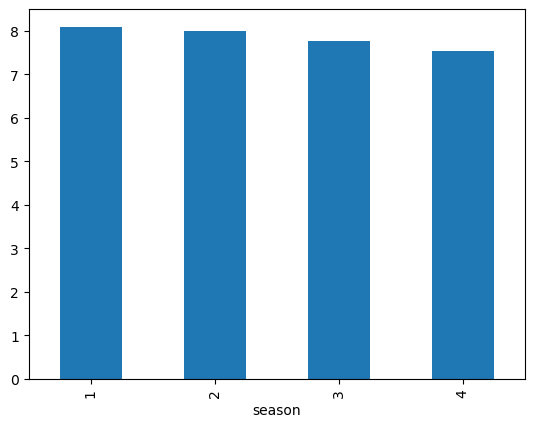

In [213]:
episodes_df.groupby('season')['average_rating'].mean().plot.bar()

### Get all the episode names, whose average rating is more than 8 for every season

In [216]:
episodes_df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [223]:
episodes_df[episodes_df['average_rating']>8][['name','average_rating']]

,name,average_rating
6,Trompe L'Oeil,8.6
8,The Well-Tempered Clavier,8.5
9,The Bicameral Mind,8.7
17,Kiksuya,8.7
18,Vanishing Point,8.4
19,The Passenger,8.5


### Get all the episode names that aired before May 2019

In [224]:
episodes_df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [231]:
episodes_df[pd.to_datetime(episodes_df['airdate'])<pd.Timestamp('2019-05-01')][['name','airdate']]

,name,airdate
0,The Original,2016-10-02
1,Chestnut,2016-10-09
2,The Stray,2016-10-16
3,Dissonance Theory,2016-10-23
4,Contrapasso,2016-10-30
5,The Adversary,2016-11-06
6,Trompe L'Oeil,2016-11-13
7,Trace Decay,2016-11-20
8,The Well-Tempered Clavier,2016-11-27
9,The Bicameral Mind,2016-12-04


### Get the episode name from each season with the highest and lowest rating

In [232]:
episodes_df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [235]:
highest_ratings = episodes_df.loc[episodes_df.groupby('season')['average_rating'].idxmax()]
lowest_ratings = episodes_df.loc[episodes_df.groupby('season')['average_rating'].idxmin()]

In [239]:
print('Episodes and season with highest ratings')
highest_ratings[['name','season','average_rating']]

Episodes and season with highest ratings


,name,season,average_rating
9,The Bicameral Mind,1,8.7
17,Kiksuya,2,8.7
20,Parce Domine,3,8.0
32,Zhuangzi,4,7.8


In [240]:
print('Episodes and season with lowerst ratings')
lowest_ratings[['name','season','average_rating']]

Episodes and season with lowerst ratings


,name,season,average_rating
2,The Stray,1,7.6
14,Akane No Mai,2,7.6
25,Decoherence,3,7.5
28,The Auguries,4,7.1


### Get the summary for the most popular ( ratings ) episode in every season

In [254]:
episodes_df.loc[episodes_df.groupby('season')['average_rating'].idxmax()][['name']]

,name
9,The Bicameral Mind
17,Kiksuya
20,Parce Domine
32,Zhuangzi


### Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions

Note -
1. Write code comments wherever required for code understanding

Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -
- Get all the cars and their types that do not qualify for clean alternative fuel vehicle
- Get all TESLA cars with the model year, and model type made in Bothell City.
- Get all the cars that have an electric range of more than 100, and were made after 2015
- Draw plots to show the distribution between city and electric vehicle type

In [303]:
cars_df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [304]:
cars_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [305]:
cars_df.shape

(130443, 17)

### Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [306]:
cars_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle Eligible                         60551
Eligibility unknown as battery range has not been researched    53446
Not eligible due to low battery range                           16446
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

In [312]:
cars_df[cars_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']!='Clean Alternative Fuel Vehicle Eligible'][['Make','Model']]

,Make,Model
6,FORD,FUSION
7,AUDI,Q5 E
8,FORD,C-MAX
11,TESLA,MODEL Y
14,FORD,C-MAX
...,...,...
130437,BMW,530E
130438,TESLA,MODEL Y
130439,NISSAN,LEAF
130440,TESLA,MODEL Y


### Get all TESLA cars with the model year, and model type made in Bothell City.


In [315]:
cars_df[(cars_df['Make']=='TESLA') & (cars_df['City']=='Bothell')][['Make','Model Year','Model']]

,Make,Model Year,Model
39,TESLA,2020,MODEL 3
217,TESLA,2022,MODEL 3
218,TESLA,2022,MODEL Y
222,TESLA,2018,MODEL 3
292,TESLA,2017,MODEL X
...,...,...,...
129778,TESLA,2019,MODEL 3
129954,TESLA,2021,MODEL 3
129976,TESLA,2014,MODEL S
130295,TESLA,2022,MODEL 3


### Get all the cars that have an electric range of more than 100, and were made after 2015

In [316]:
cars_df[(cars_df['Electric Range'] > 100) & (cars_df['Model Year']>2015)] 

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
12,5YJ3E1EC7L,Thurston,Lacey,WA,98503.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,22.0,2135486,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,5.306701e+10
13,5YJ3E1EB2L,Thurston,Olympia,WA,98516.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,22.0,124645363,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130417,5YJYGDEE5L,Pierce,Tacoma,WA,98444.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,29.0,112591538,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130428,1N4AZ1CP0J,Clallam,Sequim,WA,98382.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,24.0,290405174,POINT (-123.09968999999995 48.08137000000005),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
130432,5YJYGDEEXL,King,Vashon,WA,98070.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,34.0,112734723,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
130436,5YJ3E1EB0J,Whatcom,Blaine,WA,98230.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,42.0,103521302,POINT (-122.74888 48.99404),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10


### Draw plots to show the distribution between city and electric vehicle type

In [317]:
cars_df['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            100156
Plug-in Hybrid Electric Vehicle (PHEV)     30287
Name: Electric Vehicle Type, dtype: int64

In [330]:
len(cars_df['City'].unique())

657

In [326]:
cars_df.groupby('City')['Electric Vehicle Type'].count()

City
Aberdeen          115
Acme                7
Addy                2
Aiea                1
Airway Heights     18
                 ... 
Yacolt             32
Yakima            471
Yarrow Point      126
Yelm              197
Zillah             23
Name: Electric Vehicle Type, Length: 656, dtype: int64

In [331]:
cars_df.groupby('Electric Vehicle Type')['City'].count()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            100153
Plug-in Hybrid Electric Vehicle (PHEV)     30287
Name: City, dtype: int64

In [320]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)


In [325]:
import plotly.graph_objects as go

# Create a scatter mapbox trace
trace = go.Scattermapbox(
    lat=['46.58514'],
    lon=['-120.56916'],
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=10,
        color='red',
        opacity=0.7
    ),
    text=['Location 1'],
)

# Create the map layout
layout = go.Layout(
    mapbox=dict(
        center=dict(lat=46.58514, lon=-120.56916),
        zoom=10
    ),
)

# Create the figure and add the trace and layout
fig = go.Figure(data=[trace], layout=layout)

# Display the figure
fig.show(rednderer='browser')

fig.write_html('map.html')

# import plotly.offline as pyo
# pyo.init_notebook_mode(connected=True)



### Question 10 -
Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.
Note -
1. Write code comments wherever required for code
2. You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same

In [333]:
pip install spacy

     ---------------------------------------- 12.2/12.2 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 94.7/94.7 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB ? eta 0:00:00
     -------------------------------------- 181.6/181.6 kB 1.0 MB/s eta 0:00:00
     -------------------------------------- 480.9/480.9 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [47]:
import spacy

In [4]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 1.1 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [48]:
# import spacy

sentence = "I love watching cricket. It is a great sport activity."

# Load the English language model in SpaCy
nlp = spacy.load('en_core_web_sm')

# Process the sentence with SpaCy
doc = nlp(sentence)

# Initialize counters for each part of speech
verb_count = 0
noun_count = 0
pronoun_count = 0
adjective_count = 0
my_dict=dict()

# Iterate over each token in the processed document
for token in doc:
    # Check if the token is a verb
    if token.pos_ == 'VERB':
        verb_count += 1
        my_dict['verb']=verb_count
    # Check if the token is a noun
    elif token.pos_ == 'NOUN':
        noun_count += 1
        my_dict['noun']=noun_count
    # Check if the token is a pronoun
    elif token.pos_ == 'PRON':
        pronoun_count += 1
        my_dict['pronoun']=pronoun_count
    # Check if the token is an adjective
    elif token.pos_ == 'ADJ':
        adjective_count += 1
        my_dict['adjectives']=adjective_count

# Print the counts for each part of speech
print("Number of verbs:", verb_count)
print("Number of nouns:", noun_count)
print("Number of pronouns:", pronoun_count)
print("Number of adjectives:", adjective_count)

#print the dictionary
print(my_dict)

Number of verbs: 2
Number of nouns: 3
Number of pronouns: 2
Number of adjectives: 1
{'pronoun': 2, 'verb': 2, 'noun': 3, 'adjectives': 1}
